In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [160]:
#Our data is not using the default encoding (utf-8) so we make sure to specify the correct encoding when reading the file
data = pd.read_csv('volcdata.csv', encoding = 'unicode_escape', engine ='python')
data = data.dropna(subset=['Longitude'])
data = data.dropna(subset=['Total Deaths'])
data = data.dropna(subset=['No Affected'])

In [162]:
print(np.array(data['Longitude']))

['75.316W' ' 10.288E' ' 115.508E' '112.308E' '120.35 E' '152.203E'
 '90.880W' '105.423E' '120.994E' '110.446E' '123.7 E' '110.4 E' '130.3 E'
 '112.3 E' '98.392' '62.14 W' '-76.03' '112.308' '112.9 E' '-78.442'
 '152.203' '40.82' '145.037' '127.33' '106 E' '-89.63' '-78.436' '86.7 W'
 '130.3 E' '110.26 E' '98.392']


In [163]:
def convert_longitude(longitude):
    
    if longitude[-1]=='W':
        numeric_part= -float(longitude[:-1].strip())
    elif longitude[-1] == 'E':
        numeric_part= float(longitude[:-1].strip())
    else:
         numeric_part= float(longitude.strip())
            
    # Normalize the longitude value to be between -180 and 180
    while numeric_part > 180:
        numeric_part -= 360
    while numeric_part < -180:
        numeric_part += 360

    return numeric_part

def convert_latitude(latitude):
    # Strip any extra spaces and split by non-numeric characters
    if latitude[-1]=='S':
        numeric_part= -float(latitude[:-1].strip())
    elif latitude[-1] == 'N':
        numeric_part= float(latitude[:-1].strip())
    else:
         numeric_part= float(latitude.strip())
    
    # Normalize the latitude value to be between -90 and 90
    numeric_part = max(min(numeric_part, 90), -90)

    return numeric_part

In [164]:
lon = [convert_longitude(lon) for lon in data['Longitude']]
print(lon)

lat = [convert_latitude(lat) for lat in data['Latitude']]
print(lat)

death = list(data['Total Deaths']/25)
print(death)

affected = list(data['No Affected']/2500)
print(affected)

[-75.316, 10.288, 115.508, 112.308, 120.35, 152.203, -90.88, 105.423, 120.994, 110.446, 123.7, 110.4, 130.3, 112.3, 98.392, -62.14, -76.03, 112.308, 112.9, -78.442, 152.203, 40.82, 145.037, 127.33, 106.0, -89.63, -78.436, -86.7, 130.3, 110.26, 98.392]
[4.895, 6.441, -8.342, -7.937, 15.13, -4.21, 14.473, -6.102, 14.002, -7.54, 13.3, -7.5, 32.75, -7.9, 3.17, 16.45, 2.93, -7.93, -8.1, -1.467, -4.271, 12.17, -4.08, 0.8, -6.3, 13.852846, -0.677, 12.5, 32.75, -7.32, 3.17]
[872.0, 69.84, 63.36, 40.0, 25.6, 20.24, 18.44, 18.12, 14.2, 12.88, 3.16, 2.32, 1.72, 1.32, 1.28, 1.28, 0.64, 0.28, 0.28, 0.2, 0.2, 0.2, 0.16, 0.12, 0.08, 0.08, 0.04, 0.04, 0.04, 0.04, 0.04]
[3.08, 4.0, 31.2, 2.0, 414.348, 3.0, 685.7548, 13.4876, 20.0, 54.6744, 43.2, 1.08, 4.0, 4.106, 12.8, 1.6, 3.2, 33.2352, 0.8, 120.0, 42.4, 0.8, 0.6, 0.9472, 0.1808, 0.8, 8.0, 120.0, 1.972, 1.2, 6.0236]


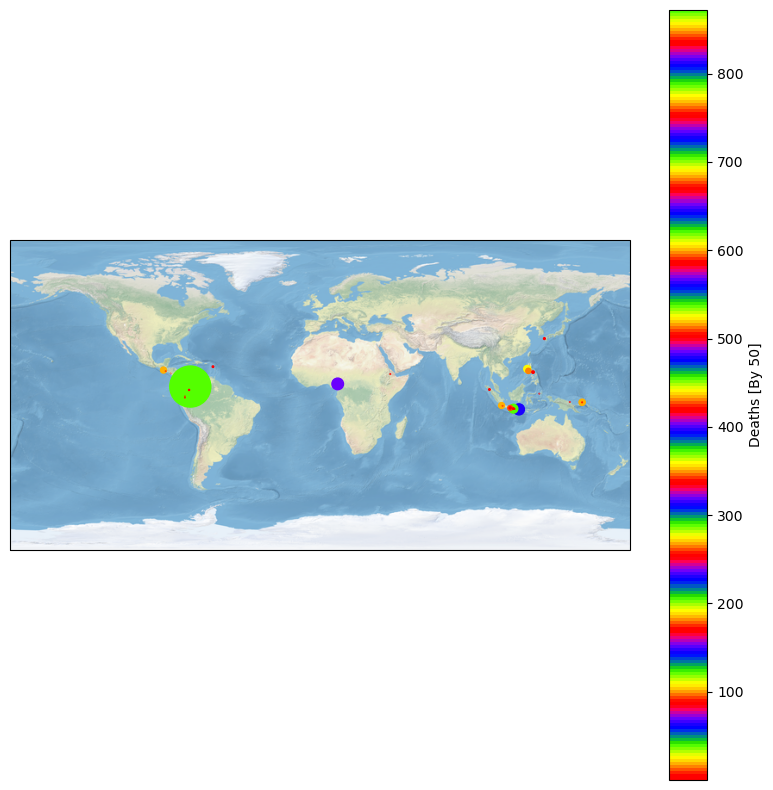

In [165]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


#ax.coastlines()

cmap = plt.get_cmap('prism')
norm = plt.Normalize(vmin=min(death), vmax=max(death))

sc = ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(), c=death, cmap=cmap, norm=norm, marker='o')


#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Deaths [By 50]')

plt.show()

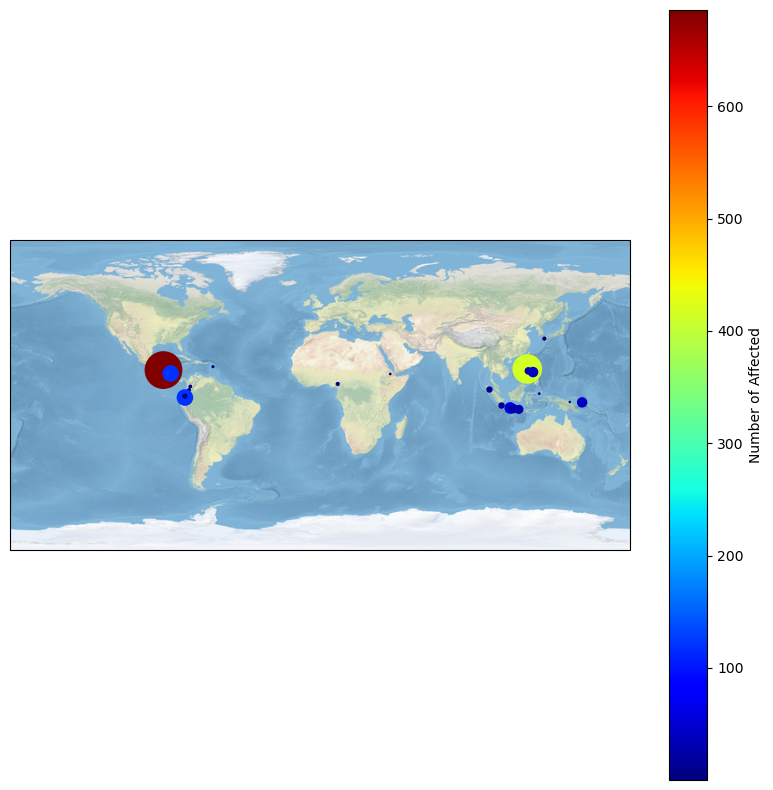

In [166]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()


#ax.coastlines()

cmap = plt.get_cmap('jet')
norm = plt.Normalize(vmin=min(affected), vmax=max(affected))

sc = ax.scatter(lon,lat, affected, transform=ccrs.PlateCarree(), c=affected, cmap=cmap, norm=norm, marker='o')


#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Number of Affected')

plt.show()